In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("HR-Employee-Attrition.csv")

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
data.shape


(1470, 35)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

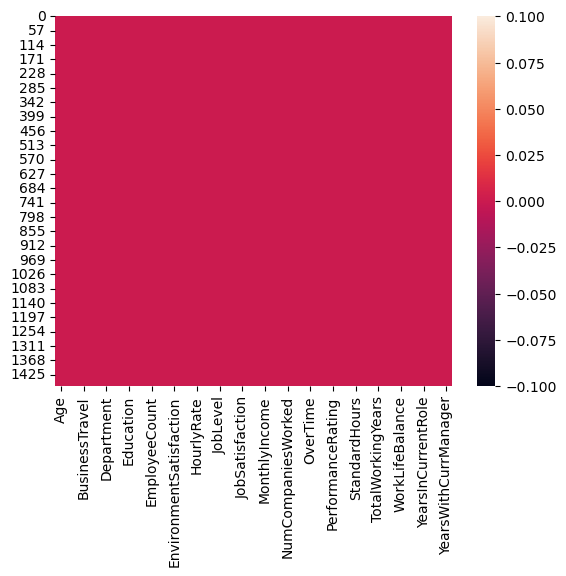

In [10]:
sns.heatmap(data.isnull())

No     1233
Yes     237
Name: Attrition, dtype: int64


Text(0.5, 1.0, 'Attrition Count')

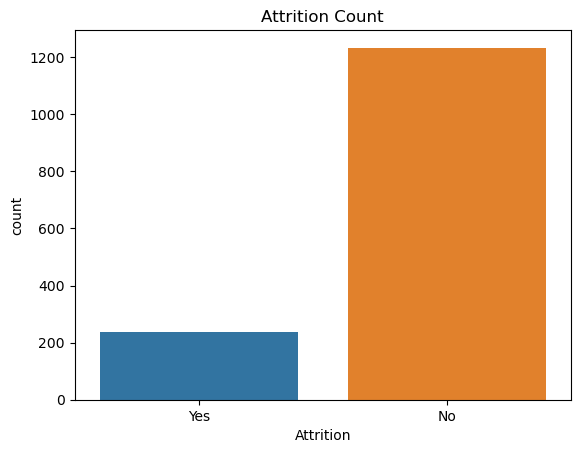

In [16]:
print(data.Attrition.value_counts())
axes=sns.countplot(x='Attrition',data=data)
plt.title('Attrition Count')

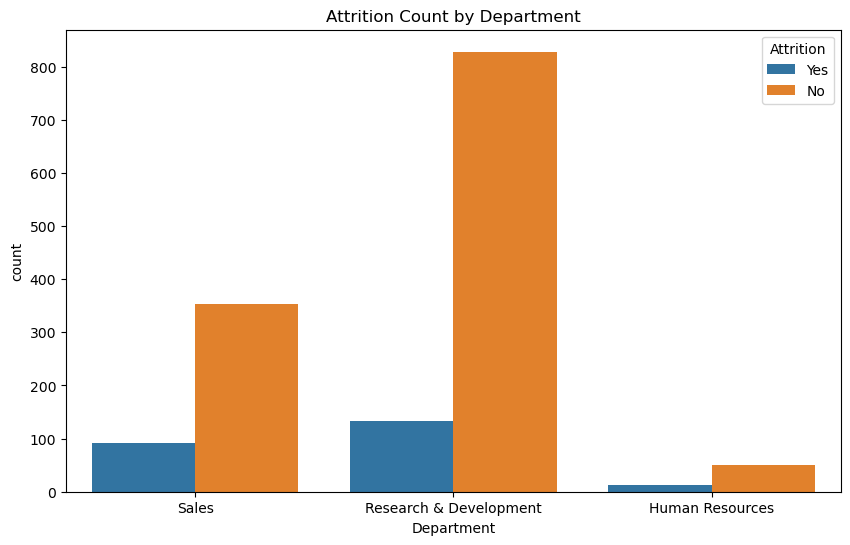

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Attrition Count by Department')
plt.show()


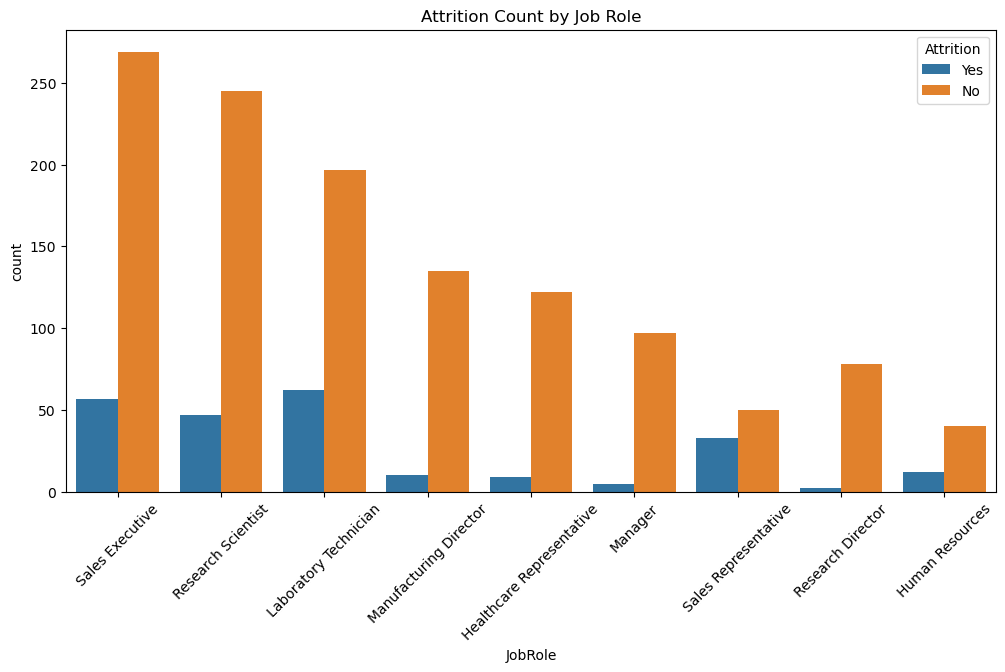

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.xticks(rotation=45)
plt.title('Attrition Count by Job Role')
plt.show()

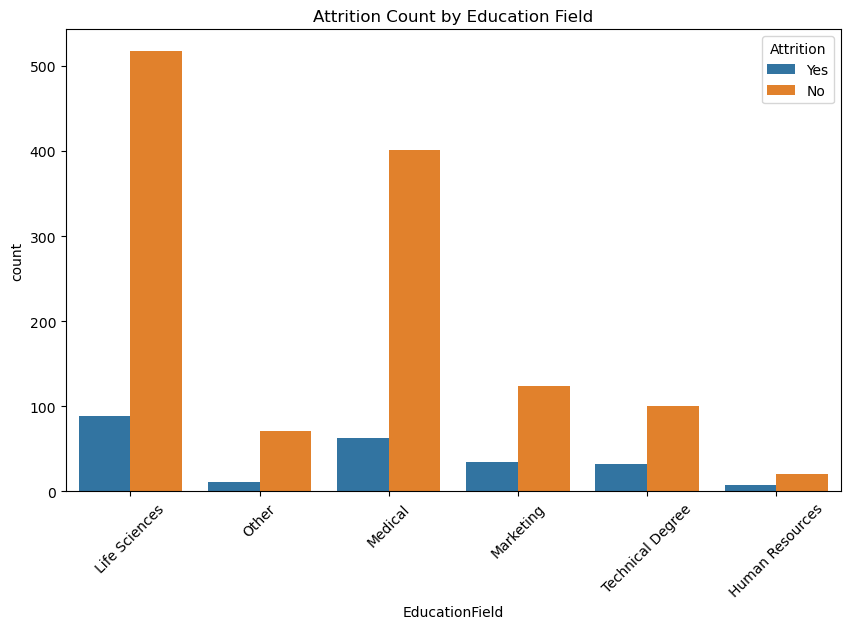

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField', hue='Attrition', data=data)
plt.xticks(rotation=45)
plt.title('Attrition Count by Education Field')
plt.show()

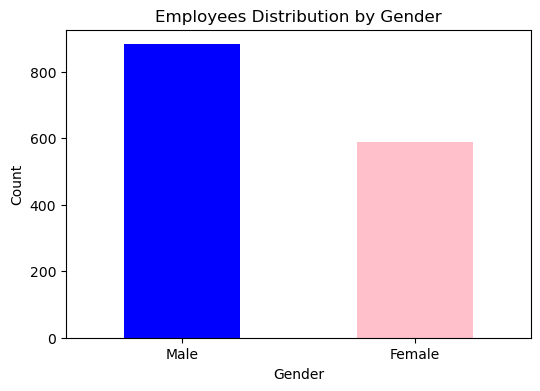

In [21]:
plt.figure(figsize=(6, 4))
data['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Employees Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [22]:
attrition_by_gender = data.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()


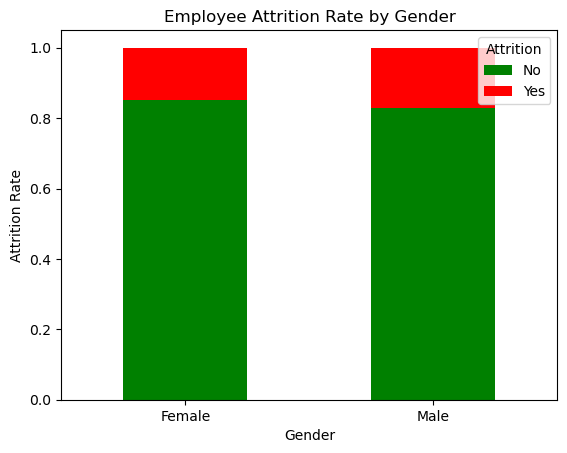

In [23]:
attrition_by_gender.plot(kind='bar', stacked='True', color=['green', 'red'])
plt.title('Employee Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=0)
plt.legend(title='Attrition', loc='upper right')
plt.show()

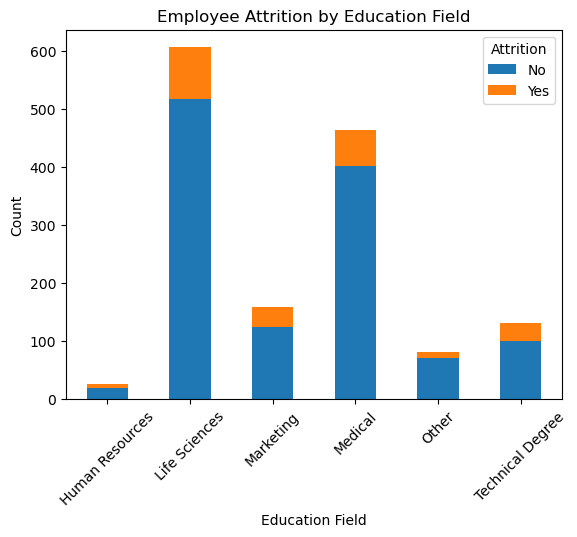

In [28]:
attrition_by_education = data.groupby(['EducationField', 'Attrition']).size().unstack()

# Plot attrition count by education
attrition_by_education.plot(kind='bar', stacked=True)
plt.title('Employee Attrition by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.show()


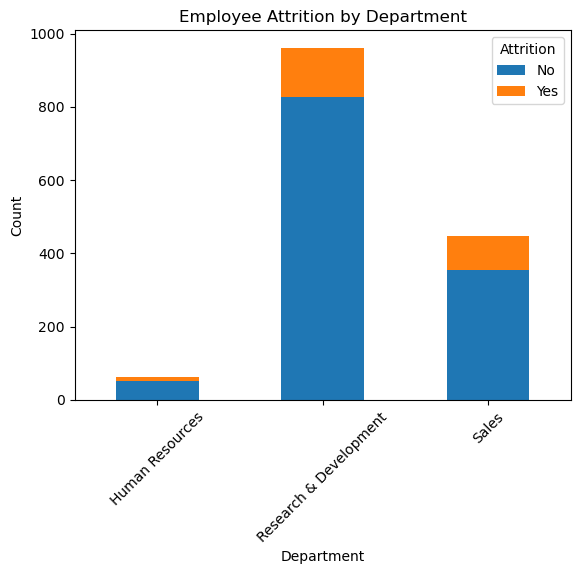

In [32]:
attrition_by_department = data.groupby('Department')['Attrition'].value_counts().unstack()

# Plot attrition count by department
attrition_by_department.plot(kind='bar', stacked=True)
plt.title('Employee Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.show()

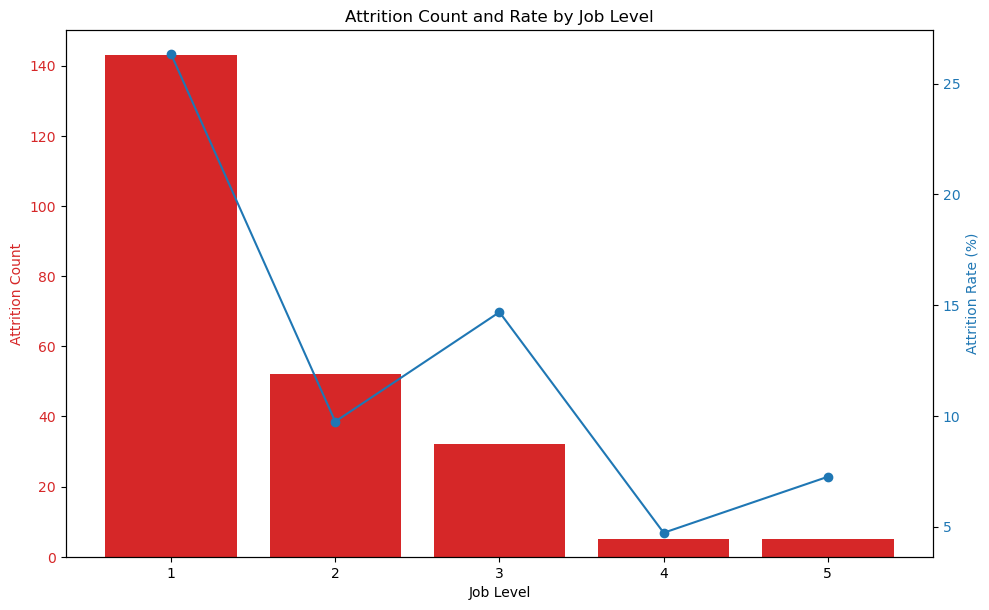

In [38]:
# Calculate attrition count and rate by job level
attrition_by_job_level = data.groupby('JobLevel')['Attrition'].value_counts().unstack()
total_employees_by_job_level = data['JobLevel'].value_counts()

# Calculate attrition rate
attrition_rate_by_job_level = (attrition_by_job_level['Yes'] / total_employees_by_job_level) * 100

# Plot attrition count and rate by job level
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Job Level')
ax1.set_ylabel('Attrition Count', color=color)
ax1.bar(attrition_by_job_level.index, attrition_by_job_level['Yes'], color=color, label='Attrition Count')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Attrition Rate (%)', color=color)  
ax2.plot(attrition_rate_by_job_level.index, attrition_rate_by_job_level, color=color, marker='o', label='Attrition Rate (%)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Attrition Count and Rate by Job Level')
plt.show()

In [48]:
le=LabelEncoder()
data['Attrition']=le.fit_transform(data['Attrition'])

list1=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for val in list1:
    data[val]=le.fit_transform(data[val].astype(str))
    

data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [53]:
x = data.drop('Attrition',axis=1)
y= data['Attrition']

In [58]:
y.shape

(1470,)

In [60]:
x.shape

(1470, 34)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
print(x.shape, x_train.shape,x_test.shape)

(1470, 34) (1176, 34) (294, 34)


In [61]:
model = LogisticRegression()


In [62]:
model.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
x_train_prediction = model.predict(x_train)

In [65]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [66]:
print('Accuracy Score of training data:',training_data_accuracy)

Accuracy Score of training data: 0.8324829931972789


In [67]:
x_test_prediction = model.predict(x_test)

In [68]:
print(x_test_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [69]:
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy score of test data:',test_data_accuracy)

Accuracy score of test data: 0.8673469387755102
